In [1]:
import math

# Sigmoid turns z into a chance (0 to 1)
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

hours = 5
z = -1.5 + 0.6 * hours  # Formula
chance = sigmoid(z)      # Get chance
prediction = "Pass" if chance > 0.5 else "Fail"  # Decide
print(f"Chance of passing: {chance:.2f} (that’s {chance*100:.0f}%)")
print(f"Prediction: {prediction}")

Chance of passing: 0.82 (that’s 82%)
Prediction: Pass


In [2]:
hours_list = [2, 4, 6]
for hours in hours_list:
    z = -1.5 + 0.6 * hours
    chance = sigmoid(z)
    prediction = "Pass" if chance > 0.5 else "Fail"
    print(f"Hours: {hours}, Chance: {chance:.2f}, Prediction: {prediction}")

Hours: 2, Chance: 0.43, Prediction: Fail
Hours: 4, Chance: 0.71, Prediction: Pass
Hours: 6, Chance: 0.89, Prediction: Pass


In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Data (hours need double brackets for Python)
hours = np.array([[2], [4], [6]])
answers = [0, 1, 1]  # 0 = Fail, 1 = Pass

# Make a model
model = LogisticRegression()
model.fit(hours, answers)  # MLE happens here

# See what it learned
print("Starting point (a0):", model.intercept_[0])
print("Change per hour (a1):", model.coef_[0][0])

# Make guesses
guesses = model.predict(hours)
print("Guesses:", guesses)  # 0 = Fail, 1 = Pass

Starting point (a0): -2.295231199284122
Change per hour (a1): 0.8185864319243061
Guesses: [0 1 1]


In [5]:
from sklearn.metrics import confusion_matrix

real = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
guesses = [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
table = confusion_matrix(real, guesses)
print("Confusion Table:\n", table)

Confusion Table:
 [[2 1]
 [0 7]]


In [6]:
from sklearn.metrics import precision_score

precision = precision_score(real, guesses)
print("Precision:", precision)

Precision: 0.875


In [7]:
from sklearn.metrics import recall_score

recall = recall_score(real, guesses)
print("Recall:", recall)

Recall: 1.0


In [8]:
from sklearn.metrics import f1_score

f1 = f1_score(real, guesses)
print("F1 Score:", f1)

F1 Score: 0.9333333333333333


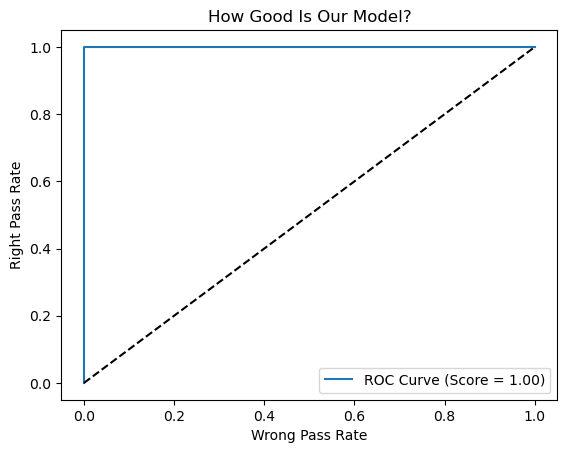

Score: 1.0


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Data
hours = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
real = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
model = LogisticRegression()
model.fit(hours, real)
chances = model.predict_proba(hours)[:, 1]  # Chances of Pass

# Make the curve
false_rate, true_rate, _ = roc_curve(real, chances)
area = auc(false_rate, true_rate)

# Draw it
plt.plot(false_rate, true_rate, label=f"ROC Curve (Score = {area:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("Wrong Pass Rate")
plt.ylabel("Right Pass Rate")
plt.title("How Good Is Our Model?")
plt.legend()
plt.show()
print("Score:", area)

In [10]:
# Too Simple Model
hours = np.array([[1], [2], [3], [4], [5]])
real = [0, 0, 1, 1, 1]
simple_model = LogisticRegression(C=0.01)  # Small C makes it simple
simple_model.fit(hours, real)
print("Simple Guesses:", simple_model.predict(hours))

# Too Picky Model
picky_model = LogisticRegression(C=1000)  # Big C makes it picky
picky_model.fit(hours, real)
print("Picky Guesses:", picky_model.predict(hours))

Simple Guesses: [1 1 1 1 1]
Picky Guesses: [0 0 1 1 1]


In [11]:
# Overfitting (learns too much)
hours_extra = np.array([[h, h*h] for h in [1, 2, 3, 4, 5]])  # Extra info
real = [0, 0, 1, 1, 1]
over_model = LogisticRegression(C=1000)
over_model.fit(hours_extra, real)
print("Overfit Training:", over_model.predict(hours_extra))
test = np.array([[5.5, 5.5*5.5]])
print("Overfit New Data:", over_model.predict(test))

# Underfitting (too simple)
under_model = LogisticRegression(C=0.01)
under_model.fit(hours, real)
print("Underfit:", under_model.predict(hours))

Overfit Training: [0 0 1 1 1]
Overfit New Data: [1]
Underfit: [1 1 1 1 1]


In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Our data
hours = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
real = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

# Teach the model
model = LogisticRegression()
model.fit(hours, real)

# Make guesses
guesses = model.predict(hours)
chances = model.predict_proba(hours)[:, 1]

# Check how good it is
print("Confusion Table:\n", confusion_matrix(real, guesses))
print("Precision (Pass accuracy):", precision_score(real, guesses))
print("Recall (Caught all Passes):", recall_score(real, guesses))
print("F1 Score (Mix of both):", f1_score(real, guesses))
print("ROC Score (Overall goodness):", roc_auc_score(real, chances))

# Guess for new students
new_hours = np.array([[1.5], [5.5]])
new_guesses = model.predict(new_hours)
print("Guesses for 1.5 and 5.5 hours:", ["Fail" if g == 0 else "Pass" for g in new_guesses])

Confusion Table:
 [[3 0]
 [0 7]]
Precision (Pass accuracy): 1.0
Recall (Caught all Passes): 1.0
F1 Score (Mix of both): 1.0
ROC Score (Overall goodness): 1.0
Guesses for 1.5 and 5.5 hours: ['Fail', 'Pass']
